Arithmetic Brownian Motion (ABM): dXt = μdt + σ⋅dWt

[0.         0.04283898 0.07427369 ... 1.17372511 1.1940372  1.17412533]


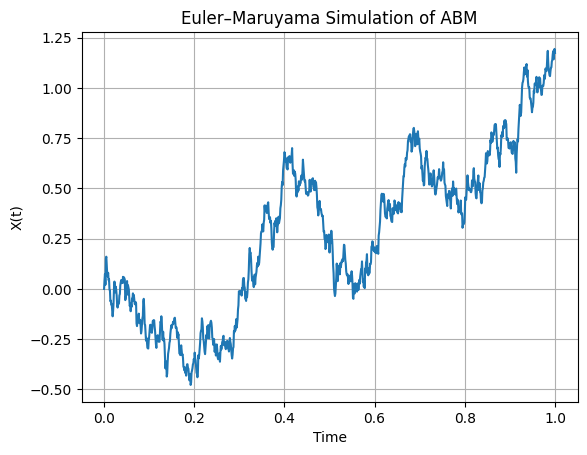

In [5]:
#Arithmetic Brownian Motion (ABM): dXt = μdt + σ⋅dWt

### Noted:
### np.random.normal(mean, std dev.)
### Euler–Maruyama: Xt+dt = Xt + μ⋅dt + σ⋅dWt

import numpy as np
import matplotlib.pyplot as plt

T = 1.0       # time horizon
N = 1000      # number of steps
dt = T / N
mu = 0.5
sigma = 1.0
X0 = 0.0

X = np.zeros(N+1)
X[0] = X0

for i in range(N):
    dW = np.random.normal(0, np.sqrt(dt))
    X[i+1] = X[i] + mu*dt + sigma*dW


print(X)
plt.plot(np.linspace(0, T, N+1), X)
plt.title("Euler–Maruyama Simulation of ABM")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid()
plt.show()

In [6]:
#Arithmetic Brownian Motion (ABM) as a function
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate and plot ABM using Euler–Maruyama
def simulate_abm(mu=0.1, sigma=0.3, X0=100, T=1.0, N=1000, label=None):
    dt = T / N
    X = np.zeros(N + 1)
    X[0] = X0

    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i + 1] = X[i] + mu * dt + sigma * dW

    time = np.linspace(0, T, N + 1)
    #plt.plot(time, X, label=label or f"μ={mu}, σ={sigma}")
    plt.plot(time, X)
    return X

array([100.        , 100.00601613, 100.00287571, ..., 100.56153176,
       100.56380313, 100.56504703])

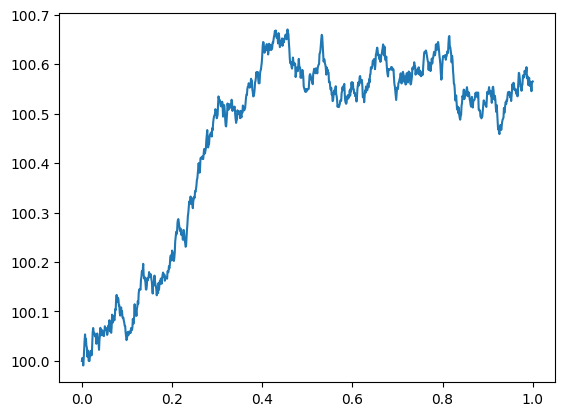

In [13]:
#Arithmetic Brownian Motion (ABM) - Try simulate 1 path
simulate_abm(mu=0.1, sigma=0.3, label="Path 1: μ=0.1, σ=0.3")

/tmp/ipython-input-21-2472481028.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


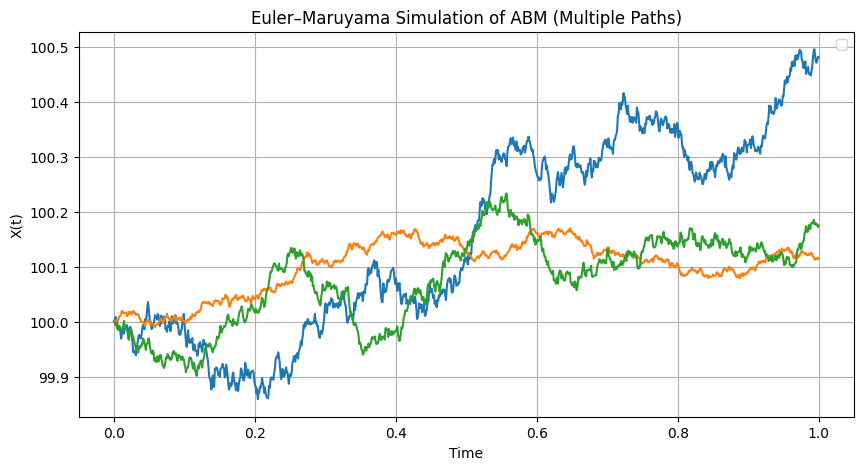

In [21]:
#Arithmetic Brownian Motion (ABM) - Plot multiple paths
# Initialize the plot
plt.figure(figsize=(10, 5))

# Simulate multiple ABM paths
simulate_abm(mu=0.1, sigma=0.3, label="Path 1: μ=0.1, σ=0.3")
simulate_abm(mu=0.05, sigma=0.1, label="Path 2: μ=0.05, σ=0.1")
simulate_abm(mu=0.2, sigma=0.2, label="Path 3: μ=0.2, σ=0.2")

# Finalize the plot
plt.title("Euler–Maruyama Simulation of ABM (Multiple Paths)")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipython-input-25-1215415484.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


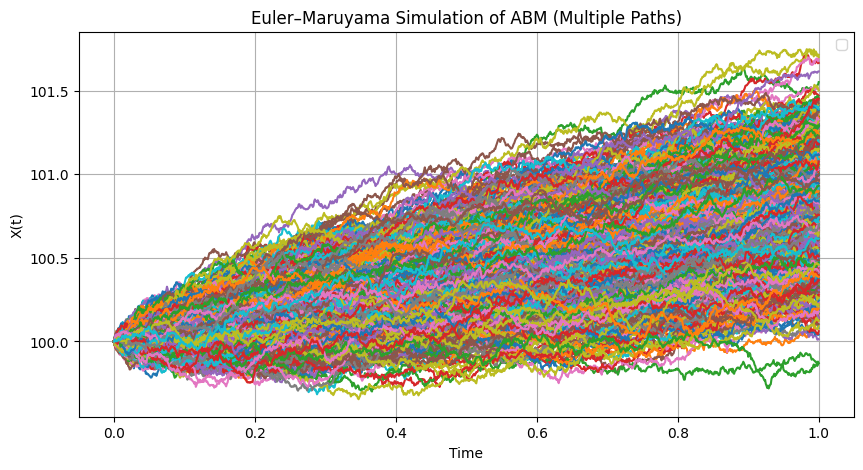

In [25]:
# Monte Carlo simulation

# Initialize the plot
plt.figure(figsize=(10, 5))

for i in range(1000):
  simulate_abm(mu=0.8, sigma=0.3)

plt.title("Euler–Maruyama Simulation of ABM (Multiple Paths)")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

[[100.          99.99999269 100.02275781 ... 101.04384144 101.02527416
  101.03534511]
 [100.         100.00920949 100.00198664 ... 100.66745319 100.64862693
  100.66451764]
 [100.          99.99817992  99.98874158 ... 101.22232895 101.21058675
  101.20954987]
 ...
 [100.         100.00504183 100.0138143  ... 101.05746715 101.05982331
  101.06480615]
 [100.          99.99037551  99.99565939 ... 100.56824631 100.57735523
  100.56558839]
 [100.          99.99910759  99.9807714  ... 101.05903236 101.07074743
  101.06434797]]


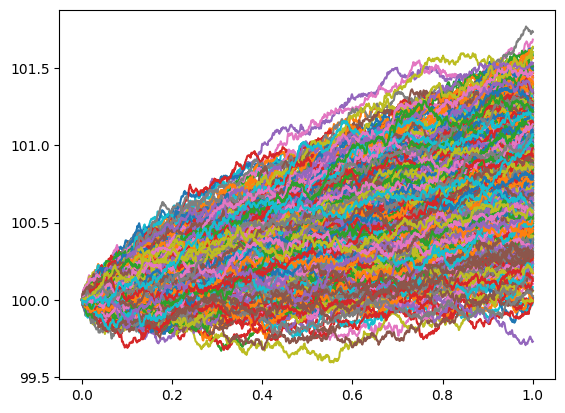

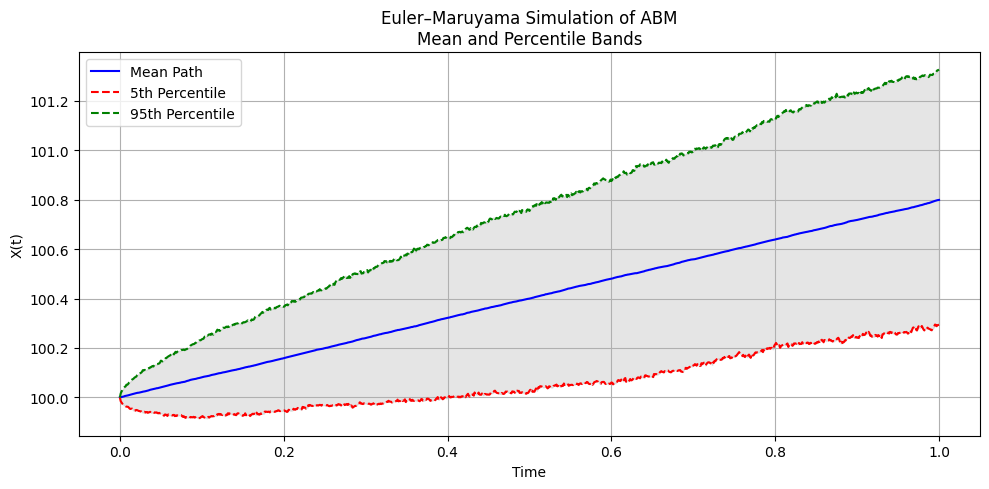

In [26]:
# Simulate multiple paths
paths = np.array([simulate_abm(mu=0.8, sigma=0.3) for _ in range(1000)])
print(paths)
# Compute statistics
mean_path = np.mean(paths, axis=0)
percentile_5 = np.percentile(paths, 5, axis=0)
percentile_95 = np.percentile(paths, 95, axis=0)
# Time vector
time = np.linspace(0, 1, 1000 + 1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, mean_path, label="Mean Path", color="blue")
plt.plot(time, percentile_5, label="5th Percentile", linestyle="--", color="red")
plt.plot(time, percentile_95, label="95th Percentile", linestyle="--", color="green")
plt.fill_between(time, percentile_5, percentile_95, color="gray", alpha=0.2)

plt.title("Euler–Maruyama Simulation of ABM\nMean and Percentile Bands")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()